In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
data=pd.read_csv("C:\\Users\\Welcome\\Desktop\\house_price\\Housing.csv")
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1330000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [23]:
data.isnull().sum()
data = pd.get_dummies(data, drop_first=True)
data

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1330000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [24]:
x = data.drop(['price'], axis = 1)
y = data['price']

In [25]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest =train_test_split(x, y, test_size =0.2,random_state = 0)

In [26]:
import sklearn
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(xtrain, ytrain)

LinearRegression()

In [27]:
ytrain_pred = lm.predict(xtrain)
ytest_pred = lm.predict(xtest)

In [28]:
df=pd.DataFrame(ytrain_pred,ytrain)
df=pd.DataFrame(ytest_pred,ytest)

In [29]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(ytest, ytest_pred)
print(mse)
mse = mean_squared_error(ytrain_pred,ytrain)
mse

989751325053.8789


1193947139895.7085

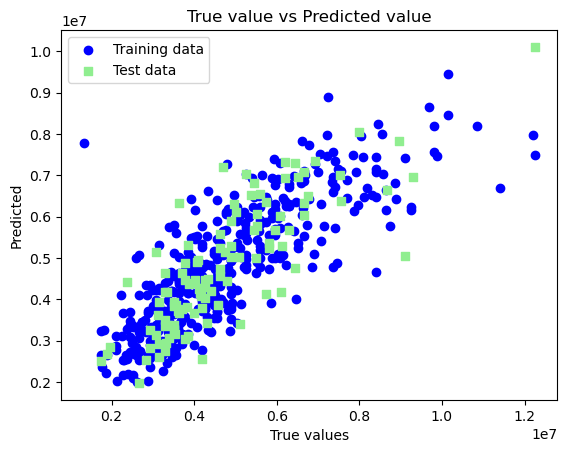

In [30]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(ytrain ,ytrain_pred,c='blue',marker='o',label='Training data')
plt.scatter(ytest,ytest_pred ,c='lightgreen',marker='s',label='Test data')
plt.xlabel('True values')
plt.ylabel('Predicted')
plt.title("True value vs Predicted value")
plt.legend(loc= 'upper left')
plt.plot()
plt.show() 

In [31]:
x=np.array([95,85,80,70,60])
y=np.array([85,95,70,65,70])


In [32]:
model= np.polyfit(x, y, 1)
model

array([ 0.64383562, 26.78082192])

In [33]:
predict = np.poly1d(model)
predict(65)

68.63013698630137

In [34]:
y_pred= predict(x)
y_pred


array([87.94520548, 81.50684932, 78.28767123, 71.84931507, 65.4109589 ])

In [35]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.4803218090889326

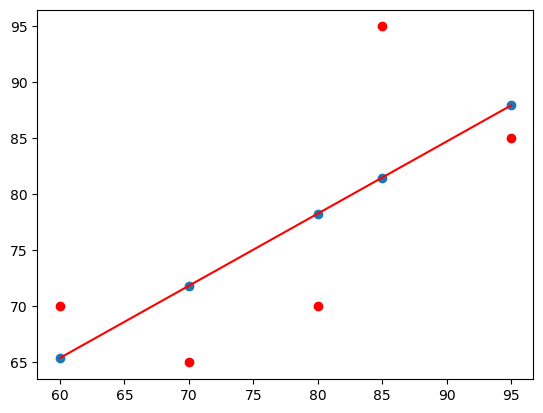

In [36]:
y_line = model[1] + model[0]* x
plt.plot(x, y_line, c = 'r')
plt.scatter(x, y_pred)
plt.scatter(x,y,c='r')